In [30]:
from goatools.obo_parser import GODag
from goatools.goea.go_enrichment_ns import GOEnrichmentStudy
import pandas as pd
import matplotlib.pyplot as plt
import requests
import numpy as np

# Step 1: Load GO DAG (ontology structure)
obo_file = "go-basic.obo"  # Ensure this file is downloaded
go_dag = GODag(obo_file)

# # Step 2: Define gene-to-GO mapping (example data; replace with real annotations)
# gene2go = {
#     "PCNA": set(["GO:0006260", "GO:0006281"]),  # Example GO terms for PCNA
#     "IFITM2": set(["GO:0035458", "GO:0045087"]),
#     "LAYN": set(["GO:0007155"]),
#     "TNFRSF9": set(["GO:0006955", "GO:0033209"])
# }



# Step 1: Define your gene list
gene_list = gene_sums.nsmallest(100).index

# Step 2: Map genes to GO terms using QuickGO API
def fetch_go_terms(gene_list):
    """
    Fetch GO terms for a list of genes using the QuickGO API.
    """
    base_url = "https://www.ebi.ac.uk/QuickGO/services/annotation/search"
    go_mapping = {}
    
    for gene in gene_list:
        params = {
#             "geneProductType": "protein",
            "geneProductId": gene,
#             "limit": 100  # Limit results per query
        }
        response = requests.get(base_url, params=params)
        if response.status_code == 200:
            data = response.json()
            go_terms = set(
                result["goId"]
                for result in data.get("results", [])
                if "goId" in result
            )
            go_mapping[gene] = go_terms
        else:
            print(f"Failed to fetch GO terms for {gene}. Status code: {response.status_code}")
    
    return go_mapping

# Fetch GO terms for your genes of interest
gene_to_go = fetch_go_terms(gene_list)

# Step 3: Prepare data for enrichment analysis
# Example background and study genes (replace with your data)
background_genes = set(gene_to_go.keys())
study_genes = set(gene_list)

# Flatten the gene-to-GO mapping for GOATOOLS input
gene2go_mapping = {gene: go_terms for gene, go_terms in gene_to_go.items() if go_terms}

# Load the Gene Ontology DAG (download `go-basic.obo` from Gene Ontology website)
obo_file = "go-basic.obo"
go_dag = GODag(obo_file)

# Perform enrichment analysis using GOATOOLS
goea = GOEnrichmentStudy(
    background_genes,
    gene2go_mapping,
    go_dag,
    methods=["fdr_bh"]  # Adjust p-values using Benjamini-Hochberg method
)

results_all = goea.run_study(study_genes)

# Filter significant results (e.g., FDR < 0.05)
significant_results = [r for r in results_all if r.p_fdr_bh < 0.05]

# Step 4: Create a DataFrame for visualization
if significant_results:
    go_terms_df = pd.DataFrame({
        "GO Term": [r.GO for r in significant_results],
        "Description": [r.name for r in significant_results],
        "-log10(p-value)": [-np.log10(r.p_fdr_bh) for r in significant_results]
    })

    # Step 5: Visualize results with a bar plot
    go_terms_df.sort_values("-log10(p-value)", ascending=False, inplace=True)
    plt.figure(figsize=(10, 6))
    plt.barh(go_terms_df["Description"], go_terms_df["-log10(p-value)"], color="skyblue")
    plt.xlabel("-log10(p-value)")
    plt.ylabel("GO Terms")
    plt.title("Top Enriched GO Terms")
    plt.gca().invert_yaxis()  # Invert y-axis for better readability
    plt.tight_layout()
    plt.show()
else:
    print("No significant GO terms found.")


# # Step 3: Define study and background genes
# study_genes = {"PCNA", "IFITM2", "LAYN", "TNFRSF9"}  # Genes of interest
# background_genes = set(gene2go.keys())  # Background set

# # Step 4: Perform GO enrichment analysis
# goea = GOEnrichmentStudy(
#     background_genes,  # Background genes
#     gene2go,           # Gene-to-GO annotations
#     go_dag             # Ontology DAG
# )
# results = goea.run_study(study_genes)

# # Step 5: Filter significant results (e.g., p-value < 0.05)
# significant_results = [r for r in results if r.p_uncorrected < 0.05]

# # Step 6: Create a DataFrame for visualization
# go_terms_df = pd.DataFrame({
#     "GO Term": [r.GO for r in significant_results],
#     "Description": [r.name for r in significant_results],
#     "-log10(p-value)": [-np.log10(r.p_fdr_bh) for r in significant_results]
# })

# # Step 7: Plot the results (bar plot)
# if not go_terms_df.empty:
#     go_terms_df = go_terms_df.sort_values("-log10(p-value)", ascending=False)
#     plt.figure(figsize=(10, 6))
#     plt.barh(go_terms_df["Description"], go_terms_df["-log10(p-value)"], color="skyblue")
#     plt.xlabel("-log10(p-value)")
#     plt.ylabel("GO Terms")
#     plt.title("Top Enriched GO Terms")
#     plt.gca().invert_yaxis()  # Invert y-axis for better readability
#     plt.tight_layout()
#     plt.show()
# else:
#     print("No significant GO terms found.")



go-basic.obo: fmt(1.2) rel(2024-10-27) 44,017 Terms
Failed to fetch GO terms for PCNA. Status code: 400
Failed to fetch GO terms for IFITM2. Status code: 400
Failed to fetch GO terms for LAYN. Status code: 400
Failed to fetch GO terms for SNHG12. Status code: 400
Failed to fetch GO terms for GINS2. Status code: 400
Failed to fetch GO terms for RAB13. Status code: 400
Failed to fetch GO terms for ETS2. Status code: 400
Failed to fetch GO terms for TNFRSF9. Status code: 400
Failed to fetch GO terms for CARD16. Status code: 400
Failed to fetch GO terms for MYL9. Status code: 400
Failed to fetch GO terms for MYL12A. Status code: 400
Failed to fetch GO terms for TRAC. Status code: 400
Failed to fetch GO terms for CD52. Status code: 400
Failed to fetch GO terms for JAML. Status code: 400
Failed to fetch GO terms for ANXA2. Status code: 400
Failed to fetch GO terms for ARHGDIB. Status code: 400
Failed to fetch GO terms for PABPC1. Status code: 400
Failed to fetch GO terms for ISG15. Status co

KeyboardInterrupt: 

In [39]:
import pandas as pd
import numpy as np

# Example data for genes and attention

dataset_dir = '../results/Bai_bi/'

# 读取文件
genes = pd.read_csv(dataset_dir + 'train_input_genes.csv', header=None)
labels = pd.read_csv(dataset_dir + 'train_label.csv', header=None)
attention = pd.read_csv(dataset_dir + 'train_attention.csv', header=None)
print(genes.shape)
print(labels.shape)
print(attention.shape)
attention = attention.iloc[:, 1:]  # 去掉第一列


# Step 1: Find genes that appear in every row of the genes DataFrame
common_genes = set(genes.iloc[0])
for row in genes.itertuples(index=False):
    common_genes.intersection_update(row)

# Remove "padding"
common_genes.discard('padding')

# Convert to a sorted list for consistent column order
common_genes = sorted(common_genes)

# Step 2: Create a new DataFrame for the common genes with corresponding attention values
new_attention = pd.DataFrame(index=range(len(attention)), columns=common_genes)

# Populate the new DataFrame with attention values
for i, row in enumerate(genes.itertuples(index=False)):
    for gene in common_genes:
        if gene in row:
            col_index = row.index(gene)  # Find the column index of the gene in the current row
            new_attention.loc[i, gene] = attention.iloc[i, col_index]

# Convert attention values to numeric (if not already)
new_attention = new_attention.apply(pd.to_numeric)

print(new_attention)


(6, 598)
(6, 1)
(6, 599)
       ACTB   ARHGDIB       B2M     CALM2     CCND2      CD82      CDK6  \
0  0.524912 -0.370587 -0.563822  0.127458  0.834274  1.116394  1.054035   
1 -0.501691 -0.074591 -0.387005 -0.158994  0.805172  0.547980  0.648940   
2 -0.826827  0.180577 -0.710101  0.298041  0.261373  0.815939  0.496497   
3 -1.803462  0.374584 -2.088977 -1.386590 -1.817257 -0.613384 -0.633840   
4 -1.394632 -0.300204 -1.177158 -0.607815  0.431646  0.668702  0.235578   
5 -0.745587 -0.221887 -1.010486 -0.394896 -0.006220  0.056753 -0.372833   

     CORO1A     COTL1      CYBA  ...    S100A6      SRGN    TMSB10   TNFAIP3  \
0 -0.049931  0.025452  0.323290  ... -0.344259  0.764785 -0.639793  0.369085   
1  0.027266  0.077383  0.163754  ... -0.284975  0.535461 -0.558914  0.227070   
2 -0.326835  0.212321  0.397413  ... -0.475741 -0.209256 -0.379048 -0.007924   
3  0.160501  0.115922  0.496868  ... -2.047152 -1.371426 -2.281957 -0.565235   
4 -0.590557  0.161417 -0.462490  ... -0.863585 -0

In [2]:
cell_data

,ACTB,ADAM19,AHI1,AHNAK,AL133453.1,ARHGDIB,ARL6IP1,ATF5,B2M,BATF,...,TNFSF10,TPM4,TRAC,TRBC2,UBB,UBE2S,UCP2,UTRN,VIM,ZBED2
0,-0.501691,0.775561,0.024797,0.467968,0.809443,-0.074591,0.319983,1.035151,-0.387005,0.720964,...,0.097885,0.530513,1.033453,0.254686,0.152592,-0.261925,0.424777,0.766422,-0.845958,0.253239
1,-0.826827,0.812317,-0.119839,0.608582,0.736979,0.180577,0.714049,0.884229,-0.710101,0.825706,...,0.390638,0.721982,0.930862,0.054290,0.010759,0.424435,0.067336,0.990151,0.201985,0.850793
2,-0.745587,0.454759,-0.719523,0.001388,0.502873,-0.221887,0.258742,0.520918,-1.010486,0.396908,...,-0.036060,-0.254725,0.725043,-0.426312,-0.516639,-0.236237,0.451807,0.500264,-1.323422,0.270070


In [4]:
gene_sums

ACTB         -2.074105
ADAM19        2.042636
AHI1         -0.814564
AHNAK         1.077938
AL133453.1    2.049296
                ...   
UBE2S        -0.073727
UCP2          0.943920
UTRN          2.256837
VIM          -1.967396
ZBED2         1.374102
Length: 130, dtype: float64

(6, 598)
(6, 1)
(6, 599)
0    0
1    1
2    1
3    0
4    0
5    1
Name: label, dtype: int64


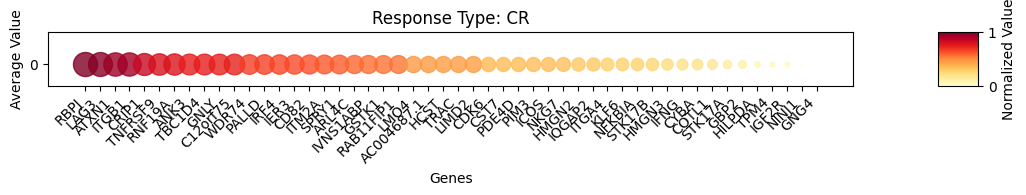

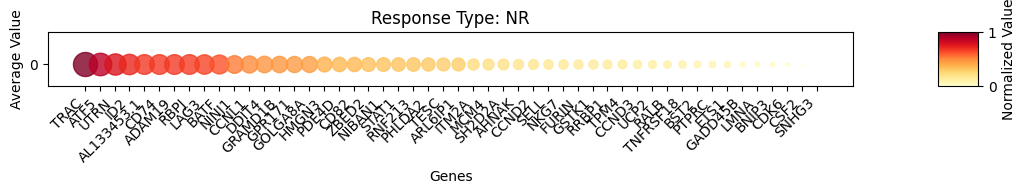

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from matplotlib.colors import Normalize

dataset_dir = '../results/Bai_bi/'

# 读取文件
genes = pd.read_csv(dataset_dir + 'train_input_genes.csv', header=None)
labels = pd.read_csv(dataset_dir + 'train_label.csv', header=None)
attention = pd.read_csv(dataset_dir + 'train_attention.csv', header=None)
print(genes.shape)
print(labels.shape)
print(attention.shape)
attention = attention.iloc[:, 1:]  # 去掉第一列


# # Step 1: Find genes that appear in every row of the genes DataFrame
# common_genes = set(genes.iloc[0])
# for row in genes.itertuples(index=False):
#     common_genes.intersection_update(row)


# common_genes.discard('padding')
# common_genes = sorted(common_genes)

# # Step 2: Create a new DataFrame for the common genes with corresponding attention values
# new_attention = pd.DataFrame(index=range(len(attention)), columns=common_genes)

# # Populate the new DataFrame with attention values
# for i, row in enumerate(genes.itertuples(index=False)):
#     for gene in common_genes:
#         if gene in row:
#             col_index = row.index(gene)  # Find the column index of the gene in the current row
#             new_attention.loc[i, gene] = attention.iloc[i, col_index]

# # Convert attention values to numeric (if not already)
# attention = new_attention.apply(pd.to_numeric)
attention['label'] = labels.iloc[:, 0]  # 添加标签列
genes['label'] = labels.iloc[:, 0] 

scaler = MinMaxScaler()

response = {0:'CR', 1:'NR', 2:'RL+', 3:'RL-'}

for cell_type in attention['label'].unique():
    atten1 = attention[attention['label'] == cell_type]
    gene1 = genes[genes['label'] == cell_type]
    atten1 = atten1.drop('label', axis=1)
    gene1 = gene1.drop('label', axis=1)
    common_genes = set(gene1.iloc[0])
    for row in gene1.itertuples(index=False):
        common_genes.intersection_update(row)

    common_genes.discard('padding')
    common_genes = sorted(common_genes)

    new_attention = pd.DataFrame(index=range(len(atten1)), columns=common_genes)

    # Populate the new DataFrame with attention values
    for i, row in enumerate(gene1.itertuples(index=False)):
        for gene2 in common_genes:
            if gene2 in row:
                col_index = row.index(gene2)  # Find the column index of the gene in the current row
                new_attention.loc[i, gene2] = atten1.iloc[i, col_index]

    # Convert attention values to numeric (if not already)
    new_attention = new_attention.apply(pd.to_numeric)
#     cell_data = new_attention.drop('label', axis=1)
    cell_data = new_attention
    
    gene_sums = cell_data.sum()
    top_genes = gene_sums.nlargest(50).index
    if cell_type == 0:
        top_genes1 = top_genes
    else:
        top_genes2 = top_genes
    
    plot_data = cell_data[top_genes]
    
#     average_row = plot_data.mean(axis=0).mean()
    plot_data = pd.DataFrame([plot_data.mean()], index=['Average'])

    
    # 对数据进行归一化
#     normalized_data = pd.DataFrame(
#         scaler.fit_transform(plot_data),
#         columns=plot_data.columns,
#         index=plot_data.index
#     )
    normalized_data = plot_data.apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=1)

    # 创建图形和axes，使用gridspec来预留colorbar的空间
    fig = plt.figure(figsize=(12, 1 * 0.7))
    gs = fig.add_gridspec(1, 2, width_ratios=[20, 1])  # 比例20:1确保主图占据足够空间
    ax = fig.add_subplot(gs[0])
    cax = fig.add_subplot(gs[1])

    # 创建标准化对象
    norm = Normalize(vmin=0, vmax=1)

    # 绘制散点图
    for i, row in enumerate(normalized_data.index):
        for j, col in enumerate(normalized_data.columns):
            value = normalized_data.iloc[i, j]
            ax.scatter(j, i, s=value*300, c=[[value]], cmap='YlOrRd', 
                      norm=norm, alpha=0.8, linewidth=1)

    # 添加colorbar
    sm = plt.cm.ScalarMappable(cmap='YlOrRd', norm=norm)
    sm.set_array([])
    plt.colorbar(sm, cax=cax, label='Normalized Value')
    ax.set_ylim(-0.2, 1-0.7)

    # 设置图形属性
    ax.set_title(f'Response Type: {response[cell_type]}')
    ax.set_xlabel('Genes')
    ax.set_ylabel('Average Value')
    ax.set_xticks(range(len(top_genes)))
    ax.set_xticklabels(top_genes, rotation=45, ha='right')
    ax.set_yticks([0])

    # 调整布局并显示
#     plt.tight_layout()
    plt.show()


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from matplotlib.colors import Normalize

dataset_dir = '../results/'

# 读取文件
genes = pd.read_csv(dataset_dir + 'train_input_genes.csv', header=None)
labels = pd.read_csv(dataset_dir + 'train_label.csv', header=None)
attention = pd.read_csv(dataset_dir + 'train_attention.csv', header=None)
print(genes.shape)
print(labels.shape)
print(attention.shape)
attention = attention.iloc[:, 1:]  # 去掉第一列

# 将数据组合在一起
attention.columns = genes.iloc[0]  # 使用基因名作为列名
attention['label'] = labels.iloc[:, 0]  # 添加标签列

# 创建MinMaxScaler实例
scaler = MinMaxScaler()

response = {0:'CR', 1:'NR', 2:'RL+', 3:'RL-'}

# 对每个细胞类型进行处理
for cell_type in attention['label'].unique():
    # 获取该类型的细胞数据
    cell_data = attention[attention['label'] == cell_type].drop('label', axis=1)
    
    # 计算每个基因的累计值并排序
    gene_sums = cell_data.sum()
    # 去掉'padding'并获取前25个基因
    top_genes = gene_sums[gene_sums.index != 'padding'].nlargest(30).index
    
    # 提取这些基因的数据
    plot_data = cell_data[top_genes]
    
#     average_row = plot_data.mean(axis=0).mean()
    plot_data = pd.DataFrame([plot_data.mean()], index=['Average'])

    
    
    # 对数据进行归一化
#     normalized_data = pd.DataFrame(
#         scaler.fit_transform(plot_data),
#         columns=plot_data.columns,
#         index=plot_data.index
#     )
    normalized_data = plot_data.apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=1)

    # 创建图形和axes，使用gridspec来预留colorbar的空间
    fig = plt.figure(figsize=(12, 1 * 0.7))
    gs = fig.add_gridspec(1, 2, width_ratios=[20, 1])  # 比例20:1确保主图占据足够空间
    ax = fig.add_subplot(gs[0])
    cax = fig.add_subplot(gs[1])

    # 创建标准化对象
    norm = Normalize(vmin=0, vmax=1)

    # 绘制散点图
    for i, row in enumerate(normalized_data.index):
        for j, col in enumerate(normalized_data.columns):
            value = normalized_data.iloc[i, j]
            ax.scatter(j, i, s=value*300, c=[[value]], cmap='YlOrRd', 
                      norm=norm, alpha=0.8, linewidth=1)

    # 添加colorbar
    sm = plt.cm.ScalarMappable(cmap='YlOrRd', norm=norm)
    sm.set_array([])
    plt.colorbar(sm, cax=cax, label='Normalized Value')
    ax.set_ylim(-0.2, 1-0.7)

    # 设置图形属性
    ax.set_title(f'Response Type: {response[cell_type]}')
    ax.set_xlabel('Genes')
    ax.set_ylabel('Average Value')
    ax.set_xticks(range(len(top_genes)))
    ax.set_xticklabels(top_genes, rotation=45, ha='right')
    ax.set_yticks([0])

    # 调整布局并显示
#     plt.tight_layout()
    plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '../results/train_input_genes.csv'